<a href="https://colab.research.google.com/github/Vicky-57/Telco-Customer-Churn-Prediction/blob/main/Vikas_Telco_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import  LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve

In [ ]:
telecom_cust = pd.read_csv('/content/drive/MyDrive/colabnotebook/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
telecom_cust.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
telecom_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
telecom_cust.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2301,4813-HQMGZ,Female,0,Yes,No,8,Yes,Yes,Fiber optic,No,...,No,Yes,No,Yes,Month-to-month,Yes,Electronic check,90.25,743.75,No
4183,6917-IAYHD,Male,0,No,Yes,1,No,No phone service,DSL,No,...,No,Yes,No,No,Month-to-month,No,Mailed check,33.60,33.6,No
2109,3521-HTQTV,Male,0,No,No,34,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),26.10,980.35,No
5165,8062-YBDOE,Male,1,No,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,69.65,69.65,Yes
2696,5472-CVMDX,Female,0,No,No,68,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,Two year,No,Mailed check,38.90,2719.2,No


In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip (22.0 MB)


In [ ]:
import pandas_profiling


In [ ]:
# copy of dataset
df=telecom_cust.copy()

In [ ]:
# categorize data into Churn and non-Churn parts
df_Churn_yes=df[df['Churn']=='Yes'].copy()
df_Churn_no=df[df['Churn']=='No'].copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
# visualization

In [ ]:
# this is the way you capture numerical column
num_col= df.describe().columns

In [ ]:
num_col

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')

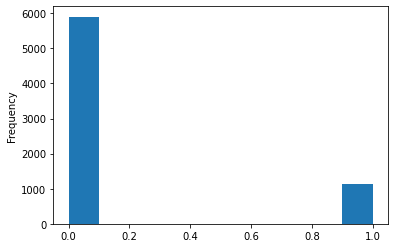

In [ ]:
df.SeniorCitizen.plot.hist()

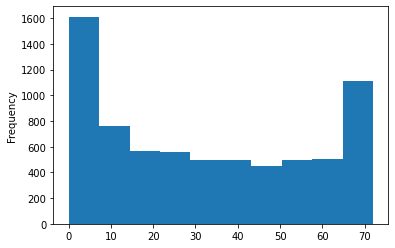

In [ ]:
df.tenure.plot.hist()

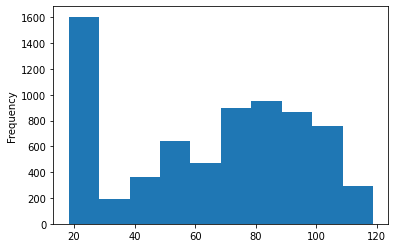

In [ ]:
df.MonthlyCharges.plot.hist()

In [ ]:
# find object column
col = df.columns
str_col=[]
for i in col:
  if  i in num_col:
    pass
  else :
    str_col.append(i)

In [ ]:
str_col

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [ ]:
len(str_col)

18

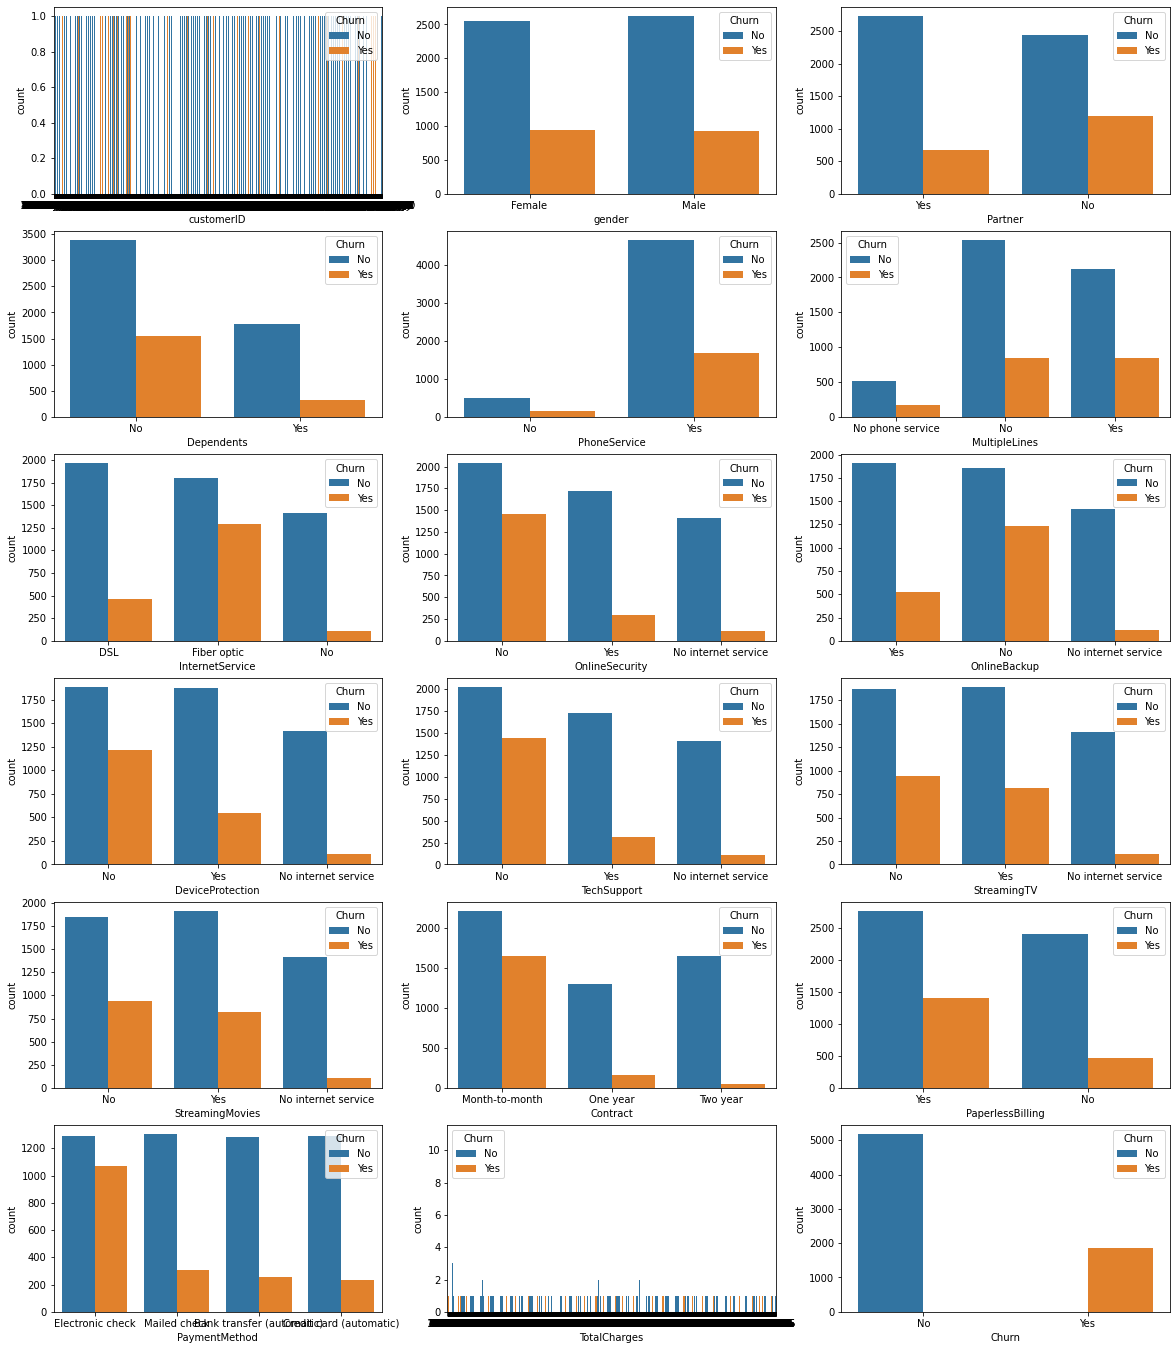

In [ ]:
plt.figure(figsize=(20,24))
for i in range(len(str_col)):
  plt.subplot(6,3,i+1)
  sns.countplot(x=str_col[i], data=df, hue='Churn')
plt.show()

In [ ]:
for i in range(len(str_col)):
  print(df[str_col[i]].value_counts(), end='\n')
  print('########################')

7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64
########################
Male      3555
Female    3488
Name: gender, dtype: int64
########################
No     3641
Yes    3402
Name: Partner, dtype: int64
########################
No     4933
Yes    2110
Name: Dependents, dtype: int64
########################
Yes    6361
No      682
Name: PhoneService, dtype: int64
########################
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
########################
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
########################
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
########################
No                     3088
Yes   

In [ ]:

le=LabelEncoder()
for i in str_col:
    df[i] = le.fit_transform(df[i])

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,157,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,925,1


In [ ]:
x=df.iloc[:,1:20]

In [ ]:
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925


In [ ]:
y=df.iloc[:,20:]

In [ ]:
y.head()

,Churn
0,0
1,0
2,1
3,0
4,1


In [ ]:
# train test split
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size=0.4,random_state=56)

In [ ]:
# Logistic regression model
from sklearn.linear_model import LogisticRegression

In [ ]:
import warnings
warnings.filterwarnings('ignore')
model= LogisticRegression()
# train the model
model.fit(x_train , y_train)
pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
print('Accuracy of Model :' , round(accuracy_score(y_test,pred)*100),' %')

Accuracy of Model : 81  %


In [ ]:
confusion_matrix(y_test,pred)

array([[1874,  202],
       [ 342,  400]])